In [21]:
from numpy import *
def loadDataSet(filename, delim = '\t'):
    fr = open(filename)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float, line)) for line in stringArr]
    return mat(datArr)

def pca(dataMat, topNfeat = 9999999):
    meanVals = mean(dataMat, axis = 0)
    meanRemoved = dataMat - meanVals
    covMat = cov(meanRemoved, rowvar = 0)
    print('covMat:', covMat)
    eigVals, eigVects = linalg.eig(mat(covMat))
    print('eigVals:', eigVals)
    print('eigVects:', eigVects)
    eigValInd = argsort(eigVals)
    eigValInd = eigValInd[:-(topNfeat + 1):-1]
    redEigVects = eigVects[:,eigValInd]
    lowDDataMat = meanRemoved * redEigVects
    print('meanRemoved:', meanRemoved)
    print('redEigVects:', redEigVects)
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat, reconMat

In [22]:
dataMat = loadDataSet('testSet.txt')

In [23]:
dataMat

matrix([[10.235186, 11.321997],
        [10.122339, 11.810993],
        [ 9.190236,  8.904943],
        ...,
        [ 9.854922,  9.201393],
        [ 9.11458 ,  9.134215],
        [10.334899,  8.543604]])

In [24]:
lowDMat, reconMat = pca(dataMat, 1)

covMat: [[1.05198368 1.1246314 ]
 [1.1246314  2.21166499]]
eigVals: [0.36651371 2.89713496]
eigVects: [[-0.85389096 -0.52045195]
 [ 0.52045195 -0.85389096]]
meanRemoved: [[ 1.17124956  2.22599482]
 [ 1.05840256  2.71499082]
 [ 0.12629956 -0.19105918]
 ...
 [ 0.79098556  0.10539082]
 [ 0.05064356  0.03821282]
 [ 1.27096256 -0.55239818]]
redEigVects: [[-0.52045195]
 [-0.85389096]]


In [25]:
shape(lowDMat)

(1000, 1)

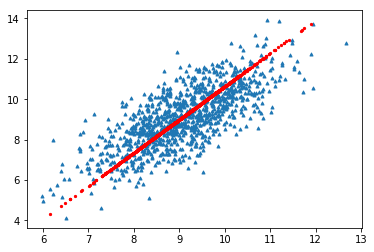

In [27]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:,0].flatten().A[0], dataMat[:,1].flatten().A[0], marker = '^', s = 9)
ax.scatter(reconMat[:,0].flatten().A[0], reconMat[:,1].flatten().A[0], marker = 'o', s = 5, c = 'red')
plt.show()

In [10]:
lowDMat, reconMat = pca(dataMat, 2)

In [18]:
def replaceNanWithMean():
    datMat = loadDataSet('secom.data', ' ')
    numFeat = shape(datMat)[1]
    for i in range(numFeat):
        meanVal = mean(datMat[nonzero(~isnan(datMat[:,i].A))[0], i])
        datMat[nonzero(isnan(datMat[:,i].A))[0],i] = meanVal
    return datMat

In [19]:
dataMat = replaceNanWithMean()

In [20]:
meanVals = mean(dataMat, axis = 0)
meanRemoved = dataMat - meanVals

In [21]:
covMat = cov(meanRemoved, rowvar = 0)

In [22]:
eigVals, eigVects = linalg.eig(mat(covMat))

In [23]:
eigVals

array([ 5.34151979e+07,  2.17466719e+07,  8.24837662e+06,  2.07388086e+06,
        1.31540439e+06,  4.67693557e+05,  2.90863555e+05,  2.83668601e+05,
        2.37155830e+05,  2.08513836e+05,  1.96098849e+05,  1.86856549e+05,
        1.52422354e+05,  1.13215032e+05,  1.08493848e+05,  1.02849533e+05,
        1.00166164e+05,  8.33473762e+04,  8.15850591e+04,  7.76560524e+04,
        6.66060410e+04,  6.52620058e+04,  5.96776503e+04,  5.16269933e+04,
        5.03324580e+04,  4.54661746e+04,  4.41914029e+04,  4.15532551e+04,
        3.55294040e+04,  3.31436743e+04,  2.67385181e+04,  1.47123429e+04,
        1.44089194e+04,  1.09321187e+04,  1.04841308e+04,  9.48876548e+03,
        8.34665462e+03,  7.22765535e+03,  5.34196392e+03,  4.95614671e+03,
        4.23060022e+03,  4.10673182e+03,  3.41199406e+03,  3.24193522e+03,
        2.74523635e+03,  2.35027999e+03,  2.16835314e+03,  1.86414157e+03,
        1.76741826e+03,  1.70492093e+03,  1.66199683e+03,  1.53948465e+03,
        1.33096008e+03,  